In [1]:
import tensorflow as tf
from data_loader.data_load import Dataset

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


# Load configuration file
config = open('/workspaces/DD2424-project/configs/alexnet_modded_config.json')

#Create Dataset of tiny-imagenet from config
dataset = Dataset(config)

#Get training data and validation data
ds_train = dataset.get_data('train')
ds_val = dataset.get_data('val')




1 Physical GPUs, 1 Logical GPUs
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph


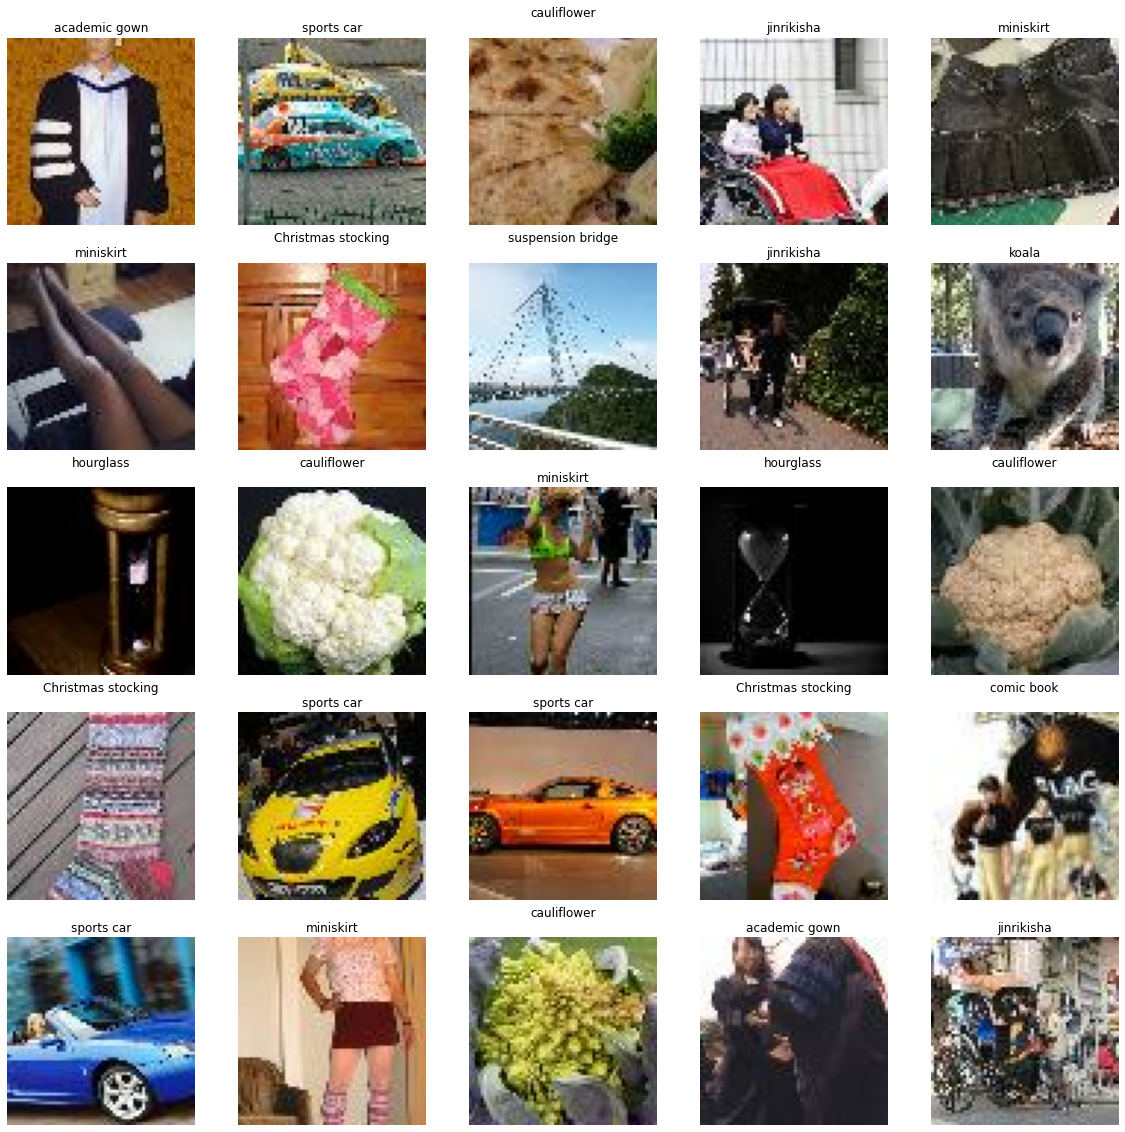

In [2]:
#Show a subset of training data 
dataset.show_batch(dataset='train')

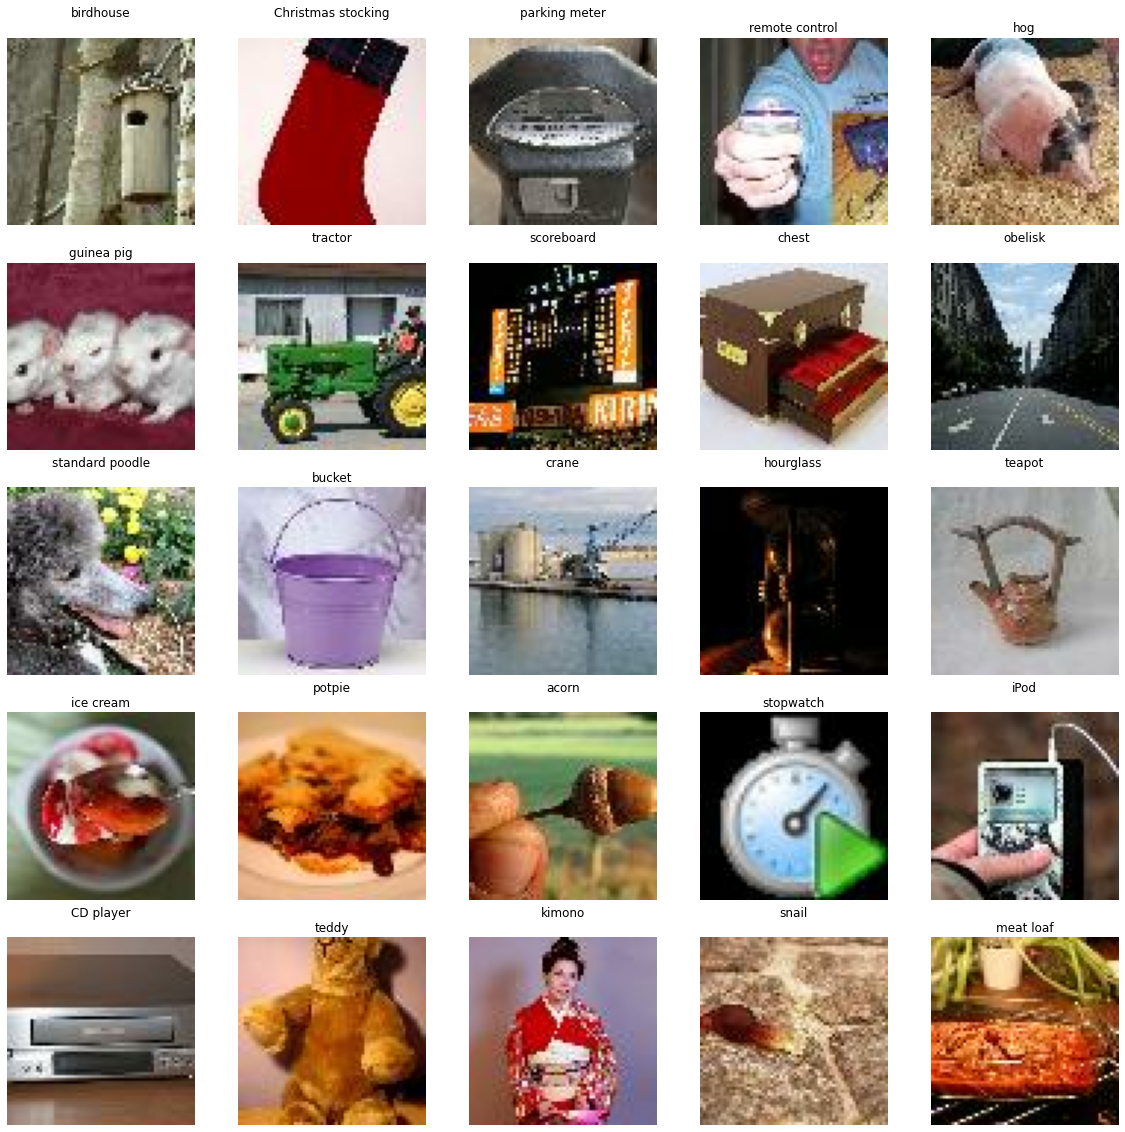

In [3]:
#Show a subset of validation data 
dataset.show_batch(dataset='val')

In [ ]:
from models.alexnet import AlexNet

#Train pure alexnet according to configuration file
alex = AlexNet(config_alex)
alex.set_train_data(ds_train)

alex.generate_model()
alex.summary()
alex.start_train()

In [3]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
%tensorboard --logdir=logs --host=0.0.0.0 --port=6006

In [5]:
from models.alexnet_modded import AlexNetModded

config_alex = open('/workspaces/DD2424-project/configs/alexnet_modded_config.json')

#Train modded alexnet according to configuration file
alex_modded = AlexNetModded(config_alex)
alex_modded.set_train_data(ds_train)

alex_modded.generate_model()
alex_modded.summary()
alex_modded.start_train()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        247872    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)         

KeyboardInterrupt: 